# Tutorial Exercises

This week, you will be investigating attitudes to immigration using data from the <a href='https://www.europeansocialsurvey.org'>European Social Survey (ESS)</a>. 

The ESS is a highly respected survey and uses random sampling to achieve a sample that is representative of the population. The survey includes lots of questions about the social and economic circumstances of the household as well as asking a set of questions on political preferences and attitudes. 

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.graphics as smg
import statsmodels.formula.api as smf

## ESS data

Today’s data file is restricted to respondents in the UK. The outcome measure of interest is ‘better’ and is a score from 0-10 in answer to the following question: “Is the UK made a worse or a better place to live by people coming to live here from other countries?” 0 is labelled as “Worse place to live” and 10 as “better place to live”, or respondents could choose an answer in between. Thus, high scores indicate more open attitudes, i.e., those who feel more positive about the consequences of immigration, and low scores the opposite. 

This file contains several explanatory/ controls variables: 

* age (a continuous measure in years)
* sex (Male, Female)
* educ (a categorical measure with 3 levels, where 'tertiary' is higher education such as university)
* vote (a categorical measure of the party the respondent last voted for where 1 = Conservatives, 2 = Labour, 3 = any other party)
* bornuk (a binary measure of whether the respondent was born in the UK where 0 = the respondent was not born in the UK, and 1 indicates they were).

In [2]:
# load and view the data
ess = pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/immigrationData.csv')
ess

,1,vote,better,bornuk,sex,age,educ
0,2,Conservative,0.0,0,Male,75.0,NaN
1,3,Conservative,7.0,0,Male,70.0,Upper secondary
2,4,Conservative,8.0,0,Female,54.0,Tertiary
3,5,Conservative,0.0,0,Male,58.0,Upper secondary
4,6,Conservative,7.0,0,Male,76.0,Lower secondary
...,...,...,...,...,...,...,...
2199,2201,NaN,9.0,0,Female,32.0,Tertiary
2200,2202,NaN,5.0,0,Female,69.0,Lower secondary
2201,2203,NaN,5.0,0,Female,34.0,Upper secondary
2202,2204,NaN,2.0,0,Male,23.0,Lower secondary


### Data cleaning

Get to know your data. 

* How survey respondants are there? 
* For each variable, check whether there are many missing values.


In [3]:
# your code here to check for missing data

### Simple regression model

Some of the common ideas about attitudes to immigration include that younger people tend to be more positive about immigration. Let’s test this idea using regression analysis.


In [4]:
# Your code here to run a regression model Y = better, x = age
# You can refer back to last week's work for how to do this!

* What does the result tell us? 

* Is the age coefficient positive or negative and how do we interpret the size of the slope?

### Multiple regression model

We are going to add a further explanatory variable to the model: sex. 
    
This is a string variable with two categories: Male and Female. 

Add sex to your model, keeping age in the model too. ou will need to change the formula from `better ~ age` to `better ~ age + sex`


In [5]:
# Your code here to run a regression model Y = better, x1 = age, x2 = sex

* What does the coefficient for sex tell us? 

* Do men or women have more positive attitudes towards immigration? 

* In the new model that includes sex, does the age coefficient change from model 1?

NB: The eagle-eyed among you might spot that the coefficient for sex is not statistically significant. Well spotted! We will spend more time looking at statistical significance next week.

### Add a categorical variable

Next, we are going to add education as a further explanatory variable. 

* This is a categorical variable - what are its possible values?



In [6]:
ess['educ'].unique()

array([nan, 'Upper secondary', 'Tertiary', 'Lower secondary'],
      dtype=object)

Think:
    
* How many categories does the education variable have? 
* How many dummy variables are needed in the regression model? 

Before you run the model, think about what you expect to see. Do you think the coefficients will be positive or negative? 

In [7]:
# first we run this line to tell statsmodels where to find the data and the explanatory variables
reg_formula = sm.regression.linear_model.OLS.from_formula(data = ess, formula = 'better ~ age + sex + educ')

# then we run this line to fit the regression (work out the values of intercept and slope)
# the output is a structure which we will call reg_results
reg_results = reg_formula.fit()

# let's view a summary of the regression results
reg_results.summary() 
 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 better   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     65.77
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.82e-52
Time:                        10:32:08   Log-Likelihood:                -4804.3
No. Observations:                2097   AIC:                             9619.
Df Residuals:                    2092   BIC:                             9647.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   5.5960      0.198     28.298      0.000       5.208       5.984
sex[T.Male]                 0.0138      0.105      0.131      0.896      -0.193       0.220
educ[T.Tertiary]            1.9270      0.140     13.750      0.000       1.652       2.202
educ[T.Upper secondary]     0.6291      0.129      4.891      0.000       0.377       0.881
age                        -0.0152      0.003     -5.208      0.000      -0.021      -0.009
==============================================================================
Omnibus:                       42.646   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.726
Skew:                          -0.337   Prob(JB):                     3.20e-10
Kurtosis:                       2.787   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Choosing the reference category

Which category was used as the reference category?

You should be able to tell from the summary table, as there will be no $\beta$ value for the reference category - If we have categories A,B,C and B is the reference, then $\beta_A$ and $\beta_C$ tell us how much the expected value of $y$ increases or decreases in catgories A and C compared to category B.

By default, `statsmodels` chooses the least frequent category as the reference, which in this case is 'lower secondary'. So the $\beta$ values for 'Upper secondary' and 'Tertiary' tells us how much higher the value of 'better' is expected to be for survey respondants with 'Upper secondary' or 'Tertiary' education respectively.

You may wish to choose the reference category. You can do this by using slightly different syntax - for example to choose 'Upper secondary' as teh reference category, in the formula we replace the simple variable name `educ` with the code `C(educ, Treatment(reference="Upper secondary")`

I chose the middle category (Upper secondary) as the reference, so I am expecting opposite signed beta values for those with a level of education below (Lower secondary) or abobve (Tertiary) my reference category.

* Run the model, and check the output.

In [8]:
# first we run this line to tell statsmodels where to find the data and the explanatory variables
reg_formula = sm.regression.linear_model.OLS.from_formula(data = ess, formula = 'better ~ age + sex + C(educ, Treatment(reference="Upper secondary"))')
                                                          
                                                        
# then we run this line to fit the regression (work out the values of intercept and slope)
# the output is a structure which we will call reg_results
reg_results = reg_formula.fit()

# let's view a summary of the regression results
reg_results.summary() 
 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 better   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     65.77
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.82e-52
Time:                        10:32:08   Log-Likelihood:                -4804.3
No. Observations:                2097   AIC:                             9619.
Df Residuals:                    2092   BIC:                             9647.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                              6.2251      0.175     35.606      0.000       5.882       6.568
sex[T.Male]                                                            0.0138      0.105      0.131      0.896      -0.193       0.220
C(educ, Treatment(reference="Upper secondary"))[T.Lower secondary]    -0.6291      0.129     -4.891      0.000      -0.881      -0.377
C(educ, Treatment(reference="Upper secondary"))[T.Tertiary]            1.2979      0.125     10.344      0.000       1.052       1.544
age                                                                   -0.0152      0.003     -5.208      0.000      -0.021      -0.009
==============================================================================
Omnibus:                       42.646   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.726
Skew:                          -0.337   Prob(JB):                     3.20e-10
Kurtosis:                       2.787   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation

* How should you interpret the education coefficients in the model? 
* Which is the “omitted category” or “reference group” (these two terms are used interchangeably here). 
* Can you explain in words the relationship between education and immigration attitudes? 

### Further categorical variable

What do you think the attitudes will be like of people who are immigrants themselves, versus people who were born in the UK? 

Let’s test your hypothesis, by adding ‘bornuk’ to the model. This is another binary variable where 0 = born in the UK, and 1 = born outside the UK. 

Run the code. What does it show?


In [9]:
# Your code here to run a regression model Y = better, x1 = age, x2 = sex, x3 = education, x4 = bornuk

What about you? Plug your own values into the regression equation and find out what the model predicts YOUR answer to the immigration question to be. (NB: I know you are all still doing your degree! Assume you have finished it for the purpose of this exercise). 

You could use pencil and paper or Excel, or type the equation in a code block as I have done below

In [10]:
# edit this equation - 
# you will need to replace the B values with coefficients from the regression summary table, 
# and the variable names with actual values (so if your age is 20, replace 'age' with 20)
# for categorical variables you need to work out which B value to use - 

# better = B0 + B1*age + B2*sex + B3*education + B4*bornuk

# In the following examples I used 'upper secondary' as the reference category for the categorical variable 'educ'

# For example, for a person who is 41, female and tertiary educated, and was born in the UK, the value should be calculated as follows:
# better = intercept + coef(age)*41 + coef(sex[T.male])*0 + coef(educ[T.tertiary])*1 + coef(bornuk)*1
print(5.9264 + -0.0118*41 + 0.0390*0 + 1.1765*1 + 1.1811*1)

# For example, for a person who is 43, male and lower secondary educated, and was born outside the UK, the value should be calculated as follows:
# better = intercept + coef(age)*43 + coef(sex[T.male])*1 + coef(educ[T.Lower Secondary])*1 + coef(bornuk)*0
print(5.9264 + -0.0118*44 + 0.0390*1 + -0.6699*1 + 1.1811*0)

7.8002
4.7763


### Interaction terms

Finally, we are going to explore the effect of age, according to different political preferences using the ‘vote’ variable. 

We will do this by modelling the effect of 'age' and 'vote' on 'better', and adding an **interaction term** of age*vote to the model.

The code in Python for an interaction between A and B is A:B

In [11]:
# Your code here to run a regression model Y = better, x1 = age, x2 = sex, x3 = education, x4 = bornuk, x5=age*vote
# first we run this line to tell statsmodels where to find the data and the explanatory variables
reg_formula = sm.regression.linear_model.OLS.from_formula(data = ess, formula = 'better ~ age + sex + vote + age:vote')
                                                          
                                                        
# then we run this line to fit the regression (work out the values of intercept and slope)
# the output is a structure which we will call reg_results
reg_results = reg_formula.fit()

# let's view a summary of the regression results
reg_results.summary() 
 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 better   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     20.77
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.71e-23
Time:                        10:32:09   Log-Likelihood:                -3444.4
No. Observations:                1511   AIC:                             6903.
Df Residuals:                    1504   BIC:                             6940.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    6.9235      0.464     14.909      0.000       6.013       7.834
sex[T.Male]                  0.0403      0.123      0.329      0.742      -0.200       0.281
vote[T.Conservative]        -0.6885      0.589     -1.170      0.242      -1.843       0.466
vote[T.Labour]               1.1944      0.564      2.119      0.034       0.089       2.300
age                         -0.0145      0.008     -1.823      0.068      -0.030       0.001
age:vote[T.Conservative]    -0.0033      0.010     -0.332      0.740      -0.023       0.016
age:vote[T.Labour]          -0.0213      0.010     -2.133      0.033      -0.041      -0.002
==============================================================================
Omnibus:                       41.378   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.572
Skew:                          -0.403   Prob(JB):                     3.46e-10
Kurtosis:                       2.796   Cond. No.                         951.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpretation

The interaction `age:vote` breaks down the relationship between `age` and `better` into three separate relationships for the three categories of `vote`

We can visualize this using `sns.lmeplot` which plots the linear relationship between $x$ and $y$ - if we use the argument `hue='vote'` this will be done separately for each category of `vote`

/Users/joreilly/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


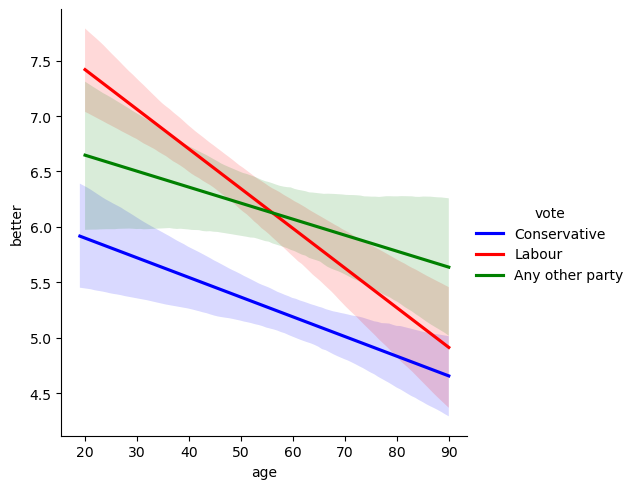

In [12]:
sns.lmplot(data=ess, x='age', y='better', hue='vote', scatter=False, palette={'Labour':'r', 'Any other party':'g', 'Conservative':'b'})
plt.show()

Interpret the results in your own words. 

Check your understanding with your classmates or your tutor. 

(Hint: where is the gap between between Labour and Conservative supporters smaller, and where it is wider?). Does this make sense to you, in terms of people you know? (Do you know many young Conservatives?) 

## Further Exercises

1. Can you run 3 separate regression models for Conservative voters, Labour voters, and Other? 
* I'd recommend creating three separate data frames for each political preference

In [13]:
# your code here!

2. Just by eyeballing the coefficients, do you think there might be any other significant interactions?

3. A conceptual question: What other variables would you like to include in the model for explaining attitudes to immigration? (Things that are not included in this data set, but you think are likely to be important. Just assume the measures would be available!)
